<a href="https://colab.research.google.com/github/varu-srma-0107/Machine-learning/blob/main/Mnist_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import imageio


import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow import keras

from fastai import *
from fastai.vision import *
from fastai.vision.all import *

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/archive/mnist_train.csv")

In [ ]:
df.shape

(60000, 785)

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train = np.array(X_train).reshape(-1,28, 28)
y_train = np.array(y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
X_train = np.stack((X_train,)*3, axis=-1)

In [ ]:
print(X_train.shape)

(60000, 28, 28, 3)


In [ ]:
def save_imgs(path:Path, data, labels):
    for label in np.unique(labels):
        (path/str(label)).mkdir(parents=True,exist_ok=True)
    for i in range(len(data)):
        if(len(labels)!=0):
            imageio.imsave( str( path/str(labels[i])/(str(i)+'.jpg') ), data[i])
        else:
            imageio.imsave( str( path/(str(i)+'.jpg') ), data[i])

In [ ]:
save_imgs(Path('/data/digits'),X_train,y_train)

In [ ]:
print('total classes :', len(os.listdir('/data/digits')))
print('Images with label 1: ', len(os.listdir('/data/digits/1')))

print('Image names with label 1')
print(os.listdir('/data/digits/1')[:10])

total classes : 10
Images with label 1:  6742
Image names with label 1
['46842.jpg', '45665.jpg', '32765.jpg', '16876.jpg', '31784.jpg', '42380.jpg', '5428.jpg', '39986.jpg', '6423.jpg', '51417.jpg']


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
import tensorflow as tf

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.15)
train_generator = train_datagen.flow_from_directory('/data/digits', class_mode='categorical', subset='training')
valid_generator = train_datagen.flow_from_directory('/data/digits', class_mode='categorical', subset='validation')

Found 51005 images belonging to 10 classes.
Found 8995 images belonging to 10 classes.


In [ ]:
x, y = train_generator[0]
print(x.shape)
print(y.shape)

(32, 256, 256, 3)
(32, 10)


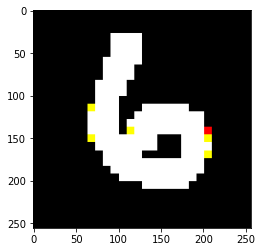

In [ ]:
plt.imshow(x[0])

In [ ]:
resnet_weights_path = r'C:\Users\LENOVO\Downloads\resnet50_weights_tf_dim_ordering_tf_kernels_notop'

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
model = Sequential()

model.add(ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet'))

# 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
model.add(Dense(10, activation = 'softmax'))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(generator=train_generator,epochs=10,validation_data=valid_generator)

Epoch 1/10


<ipython-input-23-d238ee210fa0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator,epochs=10,validation_data=valid_generator)
/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1594/1594 [==============================] - 673s 418ms/step - loss: 0.3576 - accuracy: 0.9035 - val_loss: 0.1729 - val_accuracy: 0.9539
Epoch 2/10
1594/1594 [==============================] - 673s 422ms/step - loss: 0.1475 - accuracy: 0.9582 - val_loss: 0.1352 - val_accuracy: 0.9601
Epoch 3/10
1594/1594 [==============================] - 670s 420ms/step - loss: 0.1136 - accuracy: 0.9670 - val_loss: 0.1095 - val_accuracy: 0.9679
Epoch 4/10
1594/1594 [==============================] - 670s 420ms/step - loss: 0.0960 - accuracy: 0.9716 - val_loss: 0.1132 - val_accuracy: 0.9652
Epoch 5/10
1594/1594 [==============================] - 669s 420ms/step - loss: 0.0839 - accuracy: 0.9752 - val_loss: 0.0883 - val_accuracy: 0.9728
Epoch 6/10
1594/1594 [==============================] - 670s 421ms/step - loss: 0.0752 - accuracy: 0.9775 - val_loss: 0.0959 - val_accuracy: 0.9727
Epoch 7/10
1594/1594 [==============================] - 670s 420ms/step - loss: 0.0697 - accuracy: 0.9791 - val_loss: 0.089